Find the most seen sequence for each timeperiod. Do gloabl pairwise comparisons for all pairs. Allow to toggle which pair looking at (interactive graph). Always use the older timeframe as the target and the newer as the query. 

first I want to see if I can plot the same thing in plotly so that I can use their interactivity features

In [96]:
import pandas as pd
import os

project_folder = os.path.join("..", "..")

In [97]:
df = pd.read_csv(os.path.join(project_folder, 'data', 'final', "all.csv"))
df.head()

,state,p_sequence,p_accession,date,count,n_accession,n_sequence,clade,timespan
0,MA,"""MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRS...",QTP71261,2020,2,MW885877,GGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTA...,20A,1
1,WA,"""MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRS...",QLJ57227,2020,1367,MT252714,CTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGT...,19B,1
2,WA,"""MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRS...",QLJ57383,2020,1,MT252753,CCCTTHAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTT...,19A,1
3,CA,"""MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRS...",QHW06059,2020-01-29,2,MT027064,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,19A,1
4,WA,"""MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRS...",QKS89879,2020-02-29,26,MT627216,TAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATC...,19B,1


In [1]:
seq1 = '''MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAISG
TNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLG
VYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLV
RDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENG
TITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAW
NRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNY
KLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQ
SYGFQPTYGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQ
QFGRDIDDTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQLTPTW
RVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSHRRARSVASQSIIAYTMSLGAEN
SVAYSNNSIAIPINFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVE
QDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGD
IAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQ
NVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILAR
LDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFP
QSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTHNTFVS
GNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNL
NESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEP
VLRGVKLHYT
'''
seq2 = '''MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHV
SGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPF
LGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPI
NLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYN
ENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASV
YAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIAD
YNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGAEGFNCYF
PLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFL
PFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLT
PTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLG
AENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGI
AVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDC
LGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIG
VTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDI
LSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLM
SFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNT
FVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVA
KNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDD
SEPVLKGVKLHYT'''

In [38]:
from Bio import Align
aligner = Align.PairwiseAligner(match = 4,
 mismatch = -1, 
 target_open_gap_score = -1000, 
 target_extend_gap_score  = -1000,
 query_open_gap_score = -20,
 query_extend_gap_score = -4) # parameters from this paper https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7314508/
alignments = aligner.align(seq1, seq2)

In [4]:
from Bio.Align import substitution_matrices
substitution_matrices.load() 
matrix = substitution_matrices.load("BLOSUM62")
print(matrix)  #doctest: +ELLIPSIS
aligner.substitution_matrix = matrix
score = aligner.score("ACDQ", "ACDQ")
print(score)
print(aligner.algorithm)

#  Matrix made by matblas from blosum62.iij
#  * column uses minimum score
#  BLOSUM Clustered Scoring Matrix in 1/2 Bit Units
#  Blocks Database = /data/blocks_5.0/blocks.dat
#  Cluster Percentage: >= 62
#  Entropy =   0.6979, Expected =  -0.5209
     A    R    N    D    C    Q    E    G    H    I    L    K    M    F    P    S    T    W    Y    V    B    Z    X    *
A  4.0 -1.0 -2.0 -2.0  0.0 -1.0 -1.0  0.0 -2.0 -1.0 -1.0 -1.0 -1.0 -2.0 -1.0  1.0  0.0 -3.0 -2.0  0.0 -2.0 -1.0  0.0 -4.0
R -1.0  5.0  0.0 -2.0 -3.0  1.0  0.0 -2.0  0.0 -3.0 -2.0  2.0 -1.0 -3.0 -2.0 -1.0 -1.0 -3.0 -2.0 -3.0 -1.0  0.0 -1.0 -4.0
N -2.0  0.0  6.0  1.0 -3.0  0.0  0.0  0.0  1.0 -3.0 -3.0  0.0 -2.0 -3.0 -2.0  1.0  0.0 -4.0 -2.0 -3.0  3.0  0.0 -1.0 -4.0
D -2.0 -2.0  1.0  6.0 -3.0  0.0  2.0 -1.0 -1.0 -3.0 -4.0 -1.0 -3.0 -3.0 -1.0  0.0 -1.0 -4.0 -3.0 -3.0  4.0  1.0 -1.0 -4.0
C  0.0 -3.0 -3.0 -3.0  9.0 -3.0 -4.0 -3.0 -3.0 -1.0 -1.0 -3.0 -1.0 -2.0 -3.0 -1.0 -1.0 -2.0 -2.0 -1.0 -3.0 -3.0 -2.0 -4.0
Q -1.0  1.0  0.0  0.

In [39]:
alignments = aligner.align(seq1.replace('\n', ''), seq2.replace('\n', ''))

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

dot . indicates weak conservation on substitution

colon : indicates strong conservation on substitution

pipe | indicates conserved (same)

In [138]:

def graph_pairwise(alignments, target_row, query_row, save = False, debug = False):
    string_alignments = alignments[0].format().split('\n')
    target = string_alignments[0]
    match_type = string_alignments[1]
    query = string_alignments[2]
    
    length = len(target)
    if debug:
        print(length)
    
    # Create figure and axes
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 2.25)
    fig.suptitle("Spike Protien Amino Acid Sequence Comparison",  fontsize = 'xx-large',  fontweight='normal', horizontalalignment = 'center')
    ax.set_title("{0}({1}) difference from {2}({3})".format(target_row['p_accession'], target_row['clade'], query_row['p_accession'], query_row['clade']), 
                 fontsize = 'x-large',  fontweight='normal', horizontalalignment = 'center')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_xlim([-15,1850])
    ax.set_ylim([0.5,1.5])

    y_height = 1
    ax.hlines(y=y_height, xmin=0, xmax=length, linewidth=1, color='k')

    up_factor = 0.03
    # Create rectangle patches for subunits
    rects = []
    rects.append(patches.Rectangle((14, y_height - 3 * up_factor), 671, up_factor*6, linewidth=0, edgecolor='r', facecolor='#C5B0D5', label = "S1"))
    rects.append(patches.Rectangle((686, y_height - 3 * up_factor), 587, up_factor*6, linewidth=0, edgecolor='b', facecolor='#F7B6D2', label = "S2"))

    # Add patches to the Axes
    for r in rects:
        ax.add_patch(r)



    x_insert =[]
    x_delete =[]
    x_sub_low =[]
    x_sub_high =[]
    up = 1
    up_factor = 0.2
    labels = []
    for i in range(0, length):
        if match_type[i] == '.':
            # substitution, low conservation
            x_sub_low.append(i)
            labels.append({"text":target[i] + str(i) + query[i], 'xy' :(i, y_height + up *up_factor ), 'fontsize': 'large', 'verticalalignment':'center', 'horizontalalignment':'center'})
            up = - up
        elif match_type[i] == ':':
            # subsitution, high conservation
            x_sub_high.append(i)
            labels.append({"text":target[i] + str(i) + query[i], 'xy' :(i, y_height + up *up_factor ), 'fontsize': 'large', 'verticalalignment':'center', 'horizontalalignment':'center'})
            up = - up
        elif match_type[i] == '-':
            # deletion or insertion
            if target[i] =='-':
                # insertion
                x_insert.append(i)
                labels.append({"text":str(i) + query[i], 'xy' :(i, y_height + up *up_factor ), 'fontsize': 'large', 'verticalalignment':'center', 'horizontalalignment':'center'})
                up = - up
            else: 
                # deletion (alg not allowed to match gap to gap)
                x_delete.append(i)
                labels.append({"text": target[i] + str(i), 'xy' :(change[1], y_height + up *up_factor ), 'fontsize': 'large', 'verticalalignment':'center', 'horizontalalignment':'center'})
                up = - up


    ax.plot(x_insert ,[y_height for y in x_insert], color = 'tab:orange', marker='P', markersize=10, linewidth = 0, label = 'insertion')
    ax.plot(x_delete ,[y_height for y in x_delete], color = 'tab:red', marker='X', markersize = 10, linewidth = 0, label = 'deletion')
    ax.plot(x_sub_low ,[y_height for y in x_sub_low], color = 'tab:blue', marker='o', markersize= 8,linewidth = 0, label = 'substitution, semi-conservative')
    ax.plot(x_sub_high ,[y_height for y in x_sub_high], color = 'tab:cyan', marker='o', markersize= 8,linewidth = 0, label = 'substitution, conservative')
    ax.legend(fontsize = 'x-large', loc= 'center right')

    for l in labels:
        ax.annotate(**l)

    # remove frame
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.subplots_adjust(top=0.75)
    plt.show()
    if save:
        fig.savefig('test.png', dpi=100, facecolor=fig.get_facecolor())
        # missing the background behind the title on the saved image

1273


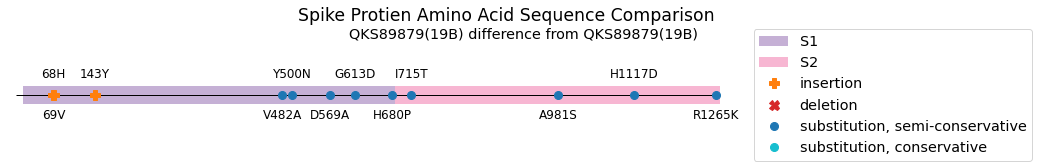

In [139]:
graph_pairwise(alignments, df.loc[df['p_accession'] == 'QKS89879'].to_dict('records')[0], df.loc[df['p_accession'] == 'QKS89879'].to_dict('records')[0], save = False, debug = True)

In [734]:
import plotly.graph_objects as go
import math

In [843]:
def plot_alignment_plotly(alignments, target_row, query_row, save = False, debug = False):
    string_alignments = alignments[0].format().split('\n')
    target = string_alignments[0]
    match_type = string_alignments[1]
    query = string_alignments[2]
    y_height = 1
    length = len(target)
    if debug:
        print(length)
        
    x_insert =[None]
    x_delete =[None]
    x_sub_low =[None]
    x_sub_high =[None] # none means it will show in legend even when there is no data

    labels = []
    yshift = 18
    level = 0
    for i in range(0, length):
        if match_type[i] == '.':
            # substitution, low conservation
            x_sub_low.append(i)
            labels.append({"text":target[i] + str(i) + query[i], 'x':i, 'y':y_height , 
                           'font' :{'size': 12}, 'showarrow':False, 'yshift': yshift * (level % 2 + 1), 'yanchor':'middle', 'xanchor':'center'})
           
            if yshift < 0:
                level = level + 1
            yshift = -yshift
        elif match_type[i] == ':':
            # subsitution, high conservation
            x_sub_high.append(i)
            labels.append({"text":target[i] + str(i) + query[i], 'x' :i,  'y':y_height , 
                           'font' :{'size': 12}, 'showarrow':False, 'yshift': yshift * (level % 2 + 1), 'yanchor':'middle', 'xanchor':'center'})
            if yshift < 0:
                level = level + 1
            yshift = -yshift
        elif match_type[i] == '-':
            # deletion or insertion
            if target[i] =='-':
                # insertion
                x_insert.append(i)
                labels.append({"text":str(i) + query[i], 'x' :i,  'y':y_height , 
                           'font' :{'size': 12}, 'showarrow':False, 'yshift': yshift * (level % 2 + 1), 'yanchor':'middle', 'xanchor':'center'})
                if yshift < 0:
                    level = level + 1
                yshift = -yshift
            else: 
                # deletion (alg not allowed to match gap to gap)
                x_delete.append(i)
                labels.append({"text": target[i] + str(i), 'x' :i, 'y':y_height , 
                           'font' :{'size': 12}, 'showarrow':False, 'yshift': yshift * (level % 2 + 1), 'yanchor':'middle', 'xanchor':'center'})
                if yshift < 0:
                    level = level + 1
                yshift = -yshift
                
    total = len(x_insert)+ len(x_delete) +len(x_sub_low) + len(x_sub_high) - 4 # total number of changes
    counts = [len(x_insert)-1, len(x_delete) - 1, len(x_sub_low) -1 , len(x_sub_high) - 1 ]
    names = ['Insertions', 'Deletions', 'Substitution, semi-conservative', 'Substitution, conservative']
    
    if debug:
        print(total)

    fig = go.Figure(
        [go.Scatter( # base gray line
            mode = "lines",
            x =  [0, length],
            y = [y_height, y_height], 
            name = "sequence line",
            line = {'color':  'gray'},
            showlegend = False,
            hoverinfo = 'skip'
        ),
         go.Scatter( # S1  line
            mode = "lines",
            x =  [14, 685],
            y = [y_height, y_height], 
            name = "S1",
            line = {'color':  'plum', 'width' : 3},
            legendgroup = 'Subunit',
            showlegend = True,
            hoverinfo = 'skip'
        ),
         go.Scatter( # S2  line
            mode = "lines",
            x =  [686, 1273],
            y = [y_height, y_height], 
            name = "S2",
            line = {'color':  'pink', 'width':3},
            legendgroup = 'Subunit',
            showlegend = True,
            hoverinfo = 'skip'
        ),
        go.Scatter( # insert markers
            mode = "markers",
            x = x_insert ,
            y = [y_height for y in x_insert], 
            name = "insertion",
            marker=dict(size=8, color = 'orange', symbol = 'square'),
            legendgroup = 'changes',
            showlegend = True,
            hoverinfo = 'x'
        ),
          go.Scatter( # delete markers
            mode = "markers",
            x = x_delete,
            y = [y_height for y in x_delete], 
            name = "deletion",
            marker=dict(size=8, color = 'red', symbol = 'square'),
            legendgroup = 'changes',
            showlegend = True,
            hoverinfo = 'x'
        ),
         go.Scatter( # sub semi markers
            mode = "markers",
            x = x_sub_low ,
            y = [y_height for y in x_sub_low], 
            name = "substitution, semi-conservative",
            marker=dict(size=8, color = 'blue', symbol = 'circle'),
            legendgroup = 'changes',
             showlegend = True,
            hoverinfo = 'x'
        ),
          go.Scatter( # sub conservative markers
            mode = "markers",
            x = x_sub_high ,
            y = [y_height for y in x_sub_high], 
            name = "substitution, conservative",
            marker=dict(size=8, color = 'lightblue', symbol = 'circle'),
            legendgroup = 'changes',
            showlegend = True,
            hoverinfo = 'x'
        ),
          go.Bar( # score bar
             x = [length, (math.log(alignments[0].score) / math.log(4*length)) * length], # best score is when all positions match, match contributes score of 4
                                         # since penalty for mismatch is so heavy (1000) using log will make the score look more intuitive
             y = [0.08, 0.08],
             orientation = 'h',
             showlegend = False,
             width = 0.16,
             text = [None, int(alignments[0].score)], # score should always be int, we don't need decimal precision and don't want .0 cluttering
             textposition = ['inside', "outside"],
             marker_color =['lightgray', 'gray'],
             hoverinfo = 'skip'
         ) ,
        go.Bar( # counts bars
             name = "counts",
             x = [1540, 1590, 1640,1700], 
             y = [(c/total) *0.9 for c in counts ],
             showlegend = False,
             width = 30,
             text =  counts, 
             marker_color =['orange', 'red', 'blue', 'lightblue'],
             marker = {'line' :dict(width = 2, color = ['orange','red','blue','lightblue'])},
             textposition = 'outside',
             hoverinfo = 'skip' # can't get the names without them in x,y,text
         )

        ]
    )

    fig.update_xaxes(
            range = [-15,1850],
            showgrid=False, # thin lines in the background
            zeroline= False, # thick line at x=0
            visible= False  # numbers below
            )

    fig.update_yaxes(
            range =[0,1.5],
            showgrid= False, # thin lines in the background
            zeroline= False, # thick line at x=0
            visible= False  # numbers below
            )
    
    labels.append({'x': 0, 'y':0.25 ,'text': "Alignment Score" ,'font': { 'size': 12},'showarrow':False, 'xanchor':'left', 'yanchor':'bottom' })
    labels.append({'x':1450, 'y':0, 'text':'counts', 'yanchor':'bottom','showarrow':False, 'textangle':0})
    subtitle = "{0} (T{4}, {1}) difference from {2} (T{5}, {3})".format(target_row['p_accession'], target_row['clade'], query_row['p_accession'], query_row['clade'], target_row['timespan'], query_row['timespan'])
    
    fig.update_layout(plot_bgcolor='white',
                      height=380,
                      width = 1100,
                      barmode = 'overlay',
                      title = dict(text = "Spike Protien Amino Acid Sequence Comparison<br><sup>{0}<sup>".format(subtitle),
                                   x = 0.1
                                  ),
                      legend=dict(
                                yanchor="middle",
                                y=1,
                                xanchor="right",
                                x=1
                    ),
                      annotations= labels
    )
    
    fig.show()
    if save:
        fig.write_html('test2.html')
        fig.write_image('test2.png')


In [844]:
plot_alignment_plotly(alignments, df.loc[df['p_accession'] == 'QKS89879'].to_dict('records')[0], df.loc[df['p_accession'] == 'QKS89879'].to_dict('records')[0], save = True, debug = False)

Try with alignment that has all four types and more changes so can see how spacing and score does.